In [16]:
from Bio import Entrez
from Bio import SeqIO

bump_2_blastout = open("/home/djeffrie/Data/M_huetii_genome/Organelles/Chloroplasts/Bumps/Bump_2_nt.out", 'r').readlines()

accessions = []

for line in bump_2_blastout:
    
    TaxID = line.split()[1]
    
    Gb_code = TaxID.split("|")[3]

    accessions.append(Gb_code)
    
accessions = list(set(accessions))

print len(accessions)



14870


In [17]:
Entrez.email = 'daniellee.jeffries@unil.ch'
handle = Entrez.efetch(db="nucleotide", id=accessions[0], rettype="gb", retmode="text")

In [24]:
Families = []

for accession in accessions:
    
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    
    x = SeqIO.read(handle, 'genbank')
    
    Families.append(x.annotations["taxonomy"][5:])
    

/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/Bio/GenBank/__init__.py:1249: BiopythonParserWarning: Expected sequence length 220, found 244 (U75228.1).
  BiopythonParserWarning)
/home/djeffrie/anaconda3/envs/py27/lib/python2.7/site-packages/Bio/GenBank/__init__.py:1249: BiopythonParserWarning: Expected sequence length 225, found 244 (U75237.1).
  BiopythonParserWarning)


HTTPError: HTTP Error 502: Bad Gateway

In [58]:
help(plt.text)

Help on function text in module matplotlib.pyplot:

text(x, y, s, fontdict=None, withdash=False, **kwargs)
    Add text to the axes.
    
    Add text in string `s` to axis at location `x`, `y`, data
    coordinates.
    
    Parameters
    ----------
    x, y : scalars
        data coordinates
    
    s : string
        text
    
    fontdict : dictionary, optional, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by your rc parameters.
    
    withdash : boolean, optional, default: False
        Creates a `~matplotlib.text.TextWithDash` instance instead of a
        `~matplotlib.text.Text` instance.
    
    Other Parameters
    ----------------
    **kwargs : `~matplotlib.text.Text` properties.
        Other miscellaneous text parameters.
    
    Examples
    --------
    Individual keyword arguments can be used to override any given
    parameter::
    
        >>> text(x, y, s, fontsize=12)
    

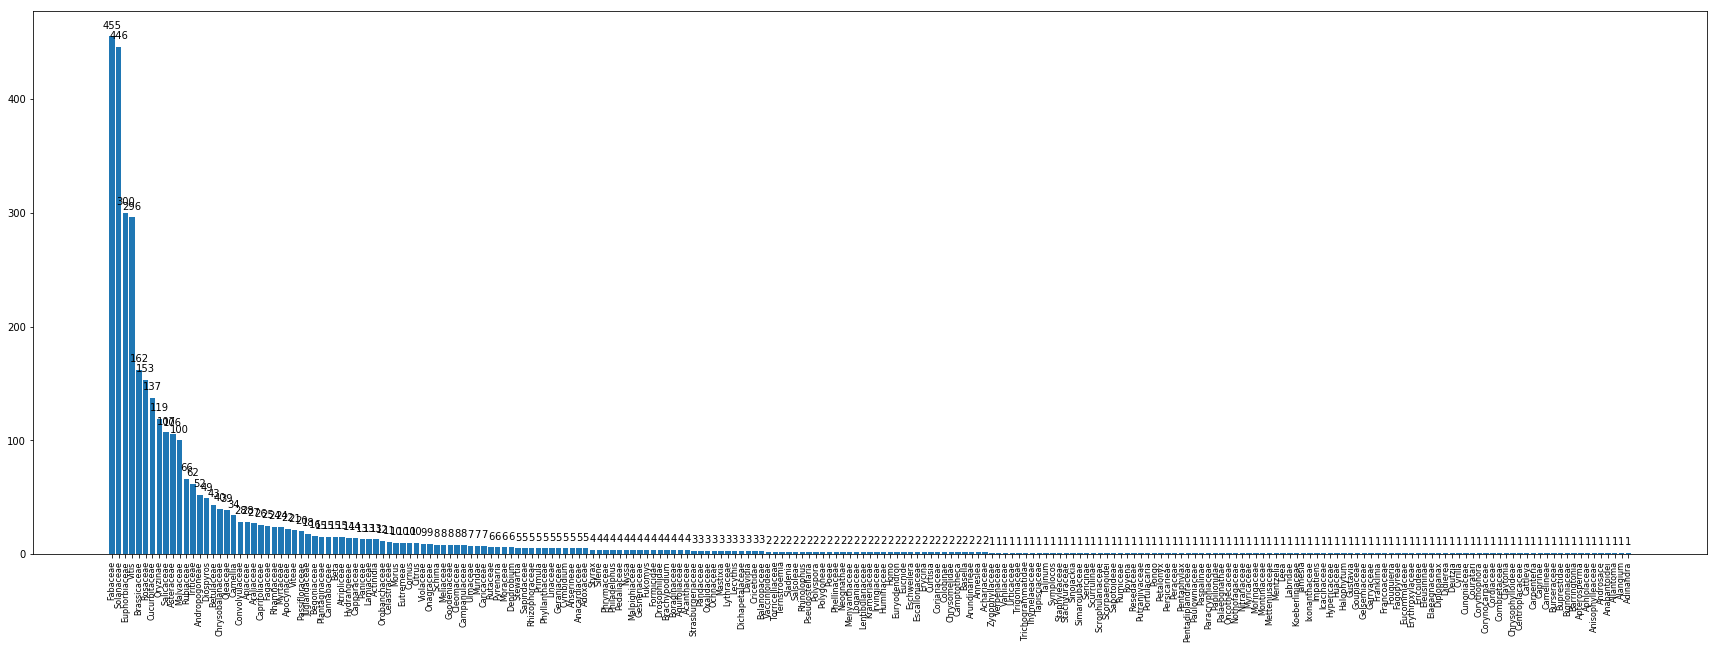

In [94]:
from collections import Counter
from matplotlib import pyplot as plt

Clades = []

### Change index to get different taxanomic levels

index = 8
for i in Families:
    if len(i) >= index+1:
        Clades.append(i[index])

Clades = Counter(Clades)

x_ticks = []
bars = []

plt.figure(figsize = (30,10))

Xcoords = []

X_coord = 0

for i,j in sorted( ((v,k) for k,v in Clades.iteritems()), reverse=True):
    bars.append(int(i))
    x_ticks.append(j)
    Xcoords.append(X_coord)
    plt.text(X_coord, i+(max(Clades.values())/60), str(i), horizontalalignment='center')
    X_coord += 1

plt.bar(Xcoords, bars)
plt.xticks(Xcoords, x_ticks, rotation = 90, fontsize = 8)

plt.savefig("/home/djeffrie/Data/M_huetii_genome/Organelles/Bump_2_Clades_%s.pdf" % index)
plt.show()

In [23]:
x.annotations["taxonomy"][-5:]

['rosids', 'malvids', 'Sapindales', 'Rutaceae', 'Citrus']